In [1]:
from mpasanalysis import *
%matplotlib inline

In [2]:
# flags
save_fig = True

In [3]:
# load data
obsname = 'OBS'
casename0 = 'GMPAS-IAF_T62_oEC60to30v3_CTRL'
casename1 = 'GMPAS-IAF_T62_oEC60to30v3_TWAV'
casename2 = 'GMPAS-IAF_T62_oEC60to30v3_LF17'
dataroot = os.environ['HOME']+'/work/mpas/LT_in_E3SM/data'
figroot = os.environ['HOME']+'/work/mpas/LT_in_E3SM/figures'
varname = 'mld_oEC60to30v3_to_0.5x0.5degree'
fileobs_jas = 'mld_1.0x1.0degree_to_0.5x0.5degree_JAS.nc'
fileobs_jfm = 'mld_1.0x1.0degree_to_0.5x0.5degree_JFM.nc'
file_jas = 'mpaso_JAS_004307_006209_climo.nc'
file_jfm = 'mpaso_JFM_004301_006203_climo.nc'
ncdataobs_jas = dataroot + '/' + obsname + '/' + fileobs_jas
ncdataobs_jfm = dataroot + '/' + obsname + '/' + fileobs_jfm
ncdata0_jas = dataroot + '/' + casename0 + '/' + varname + '/' + file_jas
ncdata0_jfm = dataroot + '/' + casename0 + '/' + varname + '/' + file_jfm
ncdata1_jas = dataroot + '/' + casename1 + '/' + varname + '/' + file_jas
ncdata1_jfm = dataroot + '/' + casename1 + '/' + varname + '/' + file_jfm
ncdata2_jas = dataroot + '/' + casename2 + '/' + varname + '/' + file_jas
ncdata2_jfm = dataroot + '/' + casename2 + '/' + varname + '/' + file_jfm
dsobs_jas = Dataset(ncdataobs_jas, 'r')
dsobs_jfm = Dataset(ncdataobs_jfm, 'r')
ds0_jas = Dataset(ncdata0_jas, 'r')
ds0_jfm = Dataset(ncdata0_jfm, 'r')
ds1_jas = Dataset(ncdata1_jas, 'r')
ds1_jfm = Dataset(ncdata1_jfm, 'r')
ds2_jas = Dataset(ncdata2_jas, 'r')
ds2_jfm = Dataset(ncdata2_jfm, 'r')

In [4]:
# processing data
lat = dsobs_jas.variables['lat'][:]
lon = dsobs_jas.variables['lon'][:]
xx, yy = np.meshgrid(lon, lat)
wgt = dsobs_jas.variables['area'][:]

datobs_jas = dsobs_jas.variables['mld'][:]
datobs_jfm = dsobs_jfm.variables['mld'][:]
dat0_jas = ds0_jas.variables['timeMonthly_avg_dThreshMLD'][:]
dat0_jfm = ds0_jfm.variables['timeMonthly_avg_dThreshMLD'][:]
dat1_jas = ds1_jas.variables['timeMonthly_avg_dThreshMLD'][:]
dat1_jfm = ds1_jfm.variables['timeMonthly_avg_dThreshMLD'][:]
dat2_jas = ds2_jas.variables['timeMonthly_avg_dThreshMLD'][:]
dat2_jfm = ds2_jfm.variables['timeMonthly_avg_dThreshMLD'][:]
# summer and winter for both hemispheres
dobs_sm = np.where(yy>0, datobs_jas, datobs_jfm)
dat0_sm = np.where(yy>0, dat0_jas, dat0_jfm)
dat1_sm = np.where(yy>0, dat1_jas, dat1_jfm)
dat2_sm = np.where(yy>0, dat2_jas, dat2_jfm)
dobs_wt = np.where(yy<0, datobs_jas, datobs_jfm)
dat0_wt = np.where(yy<0, dat0_jas, dat0_jfm)
dat1_wt = np.where(yy<0, dat1_jas, dat1_jfm)
dat2_wt = np.where(yy<0, dat2_jas, dat2_jfm)
# fill values
dobs_sm = np.ma.masked_values(dobs_sm, datobs_jas.fill_value)
dat0_sm = np.ma.masked_values(dat0_sm, dat0_jas.fill_value)
dat1_sm = np.ma.masked_values(dat1_sm, dat1_jas.fill_value)
dat2_sm = np.ma.masked_values(dat2_sm, dat2_jas.fill_value)
dobs_wt = np.ma.masked_values(dobs_wt, datobs_jas.fill_value)
dat0_wt = np.ma.masked_values(dat0_wt, dat0_jas.fill_value)
dat1_wt = np.ma.masked_values(dat1_wt, dat1_jas.fill_value)
dat2_wt = np.ma.masked_values(dat2_wt, dat2_jas.fill_value)

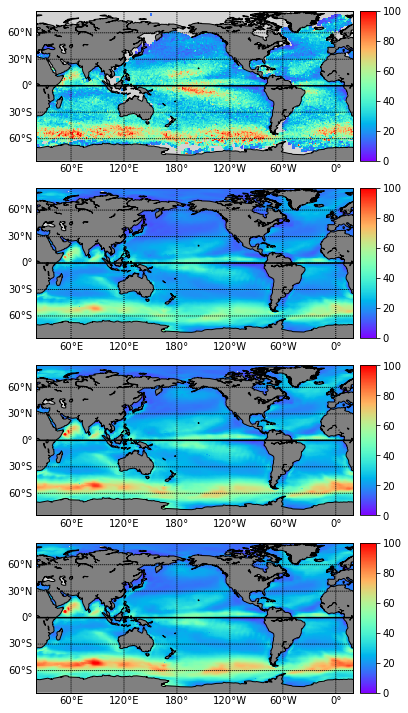

In [5]:
# summer mixed layer depth, obs, control and langmuir
f, axarr = plt.subplots(4)
f.set_size_inches(6, 10)
fig = plot_map(xx, yy, dobs_sm, axis=axarr[0], draw_eq=True, vmin=0, vmax=100)
fig = plot_map(xx, yy, dat0_sm, axis=axarr[1], draw_eq=True, vmin=0, vmax=100)
fig = plot_map(xx, yy, dat1_sm, axis=axarr[2], draw_eq=True, vmin=0, vmax=100)
fig = plot_map(xx, yy, dat2_sm, axis=axarr[3], draw_eq=True, vmin=0, vmax=100)
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_summer.png'
    plt.savefig(figname, dpi = 300)

 rmse (gl) =  14.82,
 rmse (sh) =  17.05,
 rmse (eq) =  13.66,
 rmse (nh) =   7.64.


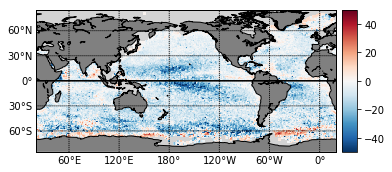

In [6]:
# summer mld bias, control
plt.figure(figsize=(6, 2.5))
fig = plot_map(xx, yy, dat0_sm-dobs_sm, draw_eq=True, cmap='RdBu_r', vmin=-50, vmax=50)
rmse_arr = rmse_lat(dobs_sm, dat0_sm, lat, [-30, 30], wgt=wgt)
print(' rmse (gl) = {:6.2f},\n rmse (sh) = {:6.2f},\n rmse (eq) = {:6.2f},\n rmse (nh) = {:6.2f}.'
      .format(rmse_arr[0], rmse_arr[1], rmse_arr[2], rmse_arr[3]))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_bias_summer_'+casename0+'.png'
    plt.savefig(figname, dpi = 300)

 rmse (gl) =  11.89,
 rmse (sh) =  13.27,
 rmse (eq) =  11.19,
 rmse (nh) =   5.92.


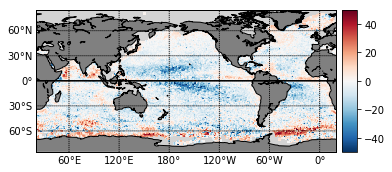

In [7]:
# summer mld bias, langmuir
plt.figure(figsize=(6, 2.5))
fig = plot_map(xx, yy, dat1_sm-dobs_sm, draw_eq=True, cmap='RdBu_r', vmin=-50, vmax=50)
rmse_arr = rmse_lat(dobs_sm, dat1_sm, lat, [-30, 30], wgt=wgt)
print(' rmse (gl) = {:6.2f},\n rmse (sh) = {:6.2f},\n rmse (eq) = {:6.2f},\n rmse (nh) = {:6.2f}.'
      .format(rmse_arr[0], rmse_arr[1], rmse_arr[2], rmse_arr[3]))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_bias_summer_'+casename1+'.png'
    plt.savefig(figname, dpi = 300)

 rmse (gl) =  12.24,
 rmse (sh) =  13.46,
 rmse (eq) =  11.63,
 rmse (nh) =   6.06.


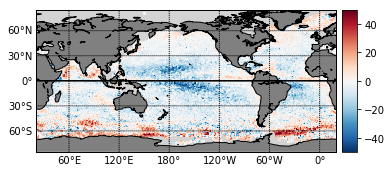

In [8]:
# summer mld bias, langmuir
plt.figure(figsize=(6, 2.5))
fig = plot_map(xx, yy, dat2_sm-dobs_sm, draw_eq=True, cmap='RdBu_r', vmin=-50, vmax=50)
rmse_arr = rmse_lat(dobs_sm, dat2_sm, lat, [-30, 30], wgt=wgt)
print(' rmse (gl) = {:6.2f},\n rmse (sh) = {:6.2f},\n rmse (eq) = {:6.2f},\n rmse (nh) = {:6.2f}.'
      .format(rmse_arr[0], rmse_arr[1], rmse_arr[2], rmse_arr[3]))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_bias_summer_'+casename2+'.png'
    plt.savefig(figname, dpi = 300)

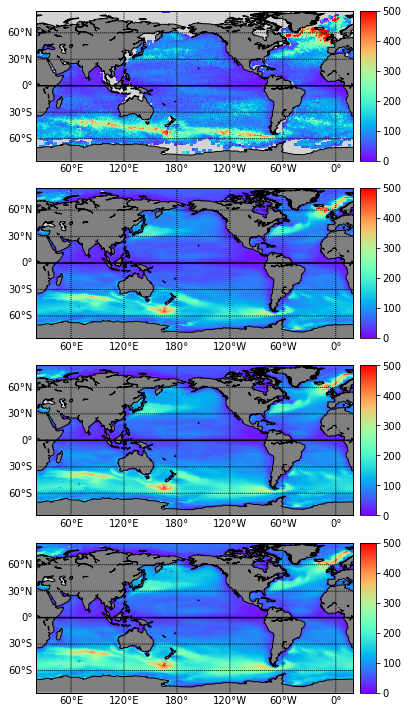

In [9]:
# winter mixed layer depth, obs, control and langmuir
f, axarr = plt.subplots(4)
f.set_size_inches(6, 10)
fig = plot_map(xx, yy, dobs_wt, axis=axarr[0], draw_eq=True, vmin=0, vmax=500)
fig = plot_map(xx, yy, dat0_wt, axis=axarr[1], draw_eq=True, vmin=0, vmax=500)
fig = plot_map(xx, yy, dat1_wt, axis=axarr[2], draw_eq=True, vmin=0, vmax=500)
fig = plot_map(xx, yy, dat2_wt, axis=axarr[3], draw_eq=True, vmin=0, vmax=500)
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_winter.png'
    plt.savefig(figname, dpi = 300)

 rmse (gl) =  54.03,
 rmse (sh) =  69.28,
 rmse (eq) =  20.19,
 rmse (nh) = 104.04.


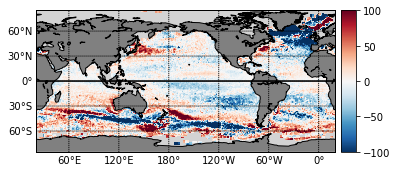

In [10]:
# control winter
plt.figure(figsize=(6, 2.5))
fig = plot_map(xx, yy, dat0_wt-dobs_wt, draw_eq=True, cmap='RdBu_r', vmin=-100, vmax=100)
rmse_arr = rmse_lat(dobs_wt, dat0_wt, lat, [-30, 30], wgt=wgt)
print(' rmse (gl) = {:6.2f},\n rmse (sh) = {:6.2f},\n rmse (eq) = {:6.2f},\n rmse (nh) = {:6.2f}.'
      .format(rmse_arr[0], rmse_arr[1], rmse_arr[2], rmse_arr[3]))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_bias_winter_'+casename0+'.png'
    plt.savefig(figname, dpi = 300)

 rmse (gl) =  54.92,
 rmse (sh) =  71.33,
 rmse (eq) =  20.81,
 rmse (nh) = 103.96.


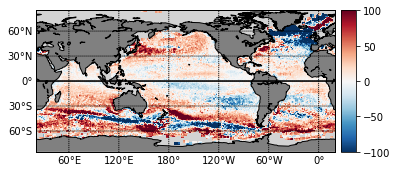

In [11]:
# Langmuir winter
plt.figure(figsize=(6, 2.5))
fig = plot_map(xx, yy, dat1_wt-dobs_wt, draw_eq=True, cmap='RdBu_r', vmin=-100, vmax=100)
rmse_arr = rmse_lat(dobs_wt, dat1_wt, lat, [-30, 30], wgt=wgt)
print(' rmse (gl) = {:6.2f},\n rmse (sh) = {:6.2f},\n rmse (eq) = {:6.2f},\n rmse (nh) = {:6.2f}.'
      .format(rmse_arr[0], rmse_arr[1], rmse_arr[2], rmse_arr[3]))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_bias_winter_'+casename1+'.png'
    plt.savefig(figname, dpi = 300)

 rmse (gl) =  58.48,
 rmse (sh) =  80.59,
 rmse (eq) =  20.92,
 rmse (nh) = 104.27.


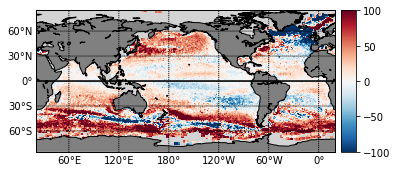

In [12]:
# Langmuir winter
plt.figure(figsize=(6, 2.5))
fig = plot_map(xx, yy, dat2_wt-dobs_wt, draw_eq=True, cmap='RdBu_r', vmin=-100, vmax=100)
rmse_arr = rmse_lat(dobs_wt, dat2_wt, lat, [-30, 30], wgt=wgt)
print(' rmse (gl) = {:6.2f},\n rmse (sh) = {:6.2f},\n rmse (eq) = {:6.2f},\n rmse (nh) = {:6.2f}.'
      .format(rmse_arr[0], rmse_arr[1], rmse_arr[2], rmse_arr[3]))
if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_bias_winter_'+casename2+'.png'
    plt.savefig(figname, dpi = 300)

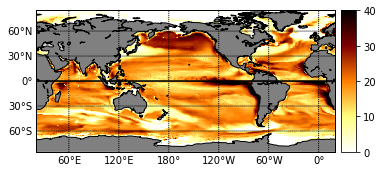

In [31]:
# Percentage change when include Langmuir (winter)
plt.figure(figsize=(6, 2.5))
fig = plot_map(xx, yy, (dat1_wt/dat0_wt-1.0)*100.0, draw_eq=True, cmap='afmhot_r', vmin=0, vmax=40)

if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_pchange_winter_'+casename1+'.png'
    plt.savefig(figname, dpi = 300)

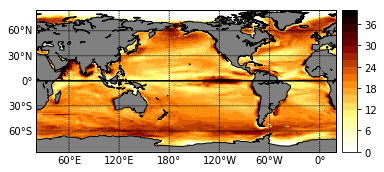

In [32]:
# Percentage change when include Langmuir (summer)
plt.figure(figsize=(6, 2.5))
levels1 = list(np.arange(21)*2)
fig = plot_map(xx, yy, (dat1_sm/dat0_sm-1.0)*100.0, draw_eq=True, cmap='afmhot_r', vmin=0, vmax=40, levels=levels1)

if save_fig:
    plt.tight_layout()
    figname = figroot+'/mld_pchange_summer_'+casename1+'.png'
    plt.savefig(figname, dpi = 300)